# Problem Statement

World Health Organization(WHO) conducted a world-wide survey and collected data from various regions of the world to determine life expectancy of the people of those regions. They collected this data through local sources and with the help of several local and internation NGOs that were operating in those areas. 

The data we have is a sample of the original data collected by WHO. Your job is to follow the Data Science pipeline and build a Machine Learning model that will predict the average life expectancy of the people of an area based on given features. The pipeline is as follows:

1. Data Wrangling and Preprocessing
2. Exploratory Data Analysis
3. Feature Selection
4. Model Training
5. Testing and Optimization

***While solving this problem, build an intuition about which features are useful using a thorough analysis and build a regression model with minimum loss/error. The evaluation metric that will be used is Mean Absolute Error. Also make sure that you model is neither underfitting nor overfitting.***  

In [1]:
# If you want to install any missing packages, then uncomment the lines given below and run them 
# to ensure that you have all the dependencies you need to run the notebook.
import sys
!{sys.executable} -m pip install missingno

  Using cached missingno-0.5.2-py3-none-any.whl.metadata (639 bytes)
Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)


In [2]:
# Libraries
import pandas as pd
import numpy as np
import missingno as mno
import seaborn as sns
import matplotlib.pyplot as plt

## Data Description 

The first thing you need to do before solving any Data Science problem is getting familiar with the dataset. Get to know your data by printing out some stats, checking its dimensions and checking data types of features.

Column | Description
:---|:---
`surface_area` | The total area in square kilometers
`agricultural_land` | The agricultural land of the total area in square kilometers 
`forest_area` | The forest area in the total area in square kilometers
`armed_forces_total` | The count of armed forces paid by this geographical area
`urban_pop_major_cities` | The percent of the total population dwelling in major cities
`urban_pop_minor_cities` | The percent of the total population dwelling in minor cities
`national_income` | National Income as an ordinal categorical variable
`inflation_annual` | Yearly Inflation Rate
`inflation_monthly` | Average Monthly Inflation Rate = annual inflation/12
`inflation_weekly` | Average Weekly Inflation Rate = annual inflation/52
`mobile_subscriptions` | Describes the number of mobile subscriptions per person 
`internet_users` | The average number of people using the internet in a range of 100 or 1000 people
`secure_internet_servers_total` | The actual number of secure internet servers in the area
`improved_sanitation` | The known access of the population to improved sanitation facilities
`women_parliament_seats_rate ` | Describes the percent range of parliament seats occupied by women
`life_expectancy` | Years of life an average person is expected to live in this area (target variable).

In [3]:
# Load training data
data = pd.read_csv('train.csv')
data = data.drop(columns=['Unnamed: 0'])
data.head()

,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,inflation_monthly,inflation_weekly,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy
0,120540.0,2.632839e+06,5.417843e+06,1379000.0,55.747169,4.688831,unknown,NaN,NaN,NaN,less than 1 per person,0 per 1000 people,NaN,high access,[0%-25%),69.494195
1,752610.0,2.403039e+07,4.957554e+07,16500.0,16.890687,23.136313,very low,NaN,0.581473,NaN,less than 1 per person,154 per 1000 people,2.623624e+06,low access,[0%-25%),59.237366
2,1396.0,3.000000e+03,8.000000e+01,NaN,18.390090,23.139910,unknown,NaN,NaN,NaN,more than 1 per person,90 per 100 people,1.656589e+09,no info,unknown,81.300000
3,2758812.0,1.228845e+08,1.050943e+08,1518650.0,50.966885,24.522427,high,1.374906,NaN,NaN,more than 1 per person,76 per 100 people,6.625072e+08,very high access,[25%-50%),81.373197
4,340.0,1.100000e+04,1.699000e+04,NaN,5.311885,30.271115,unknown,-0.044229,NaN,NaN,more than 1 per person,350 per 1000 people,2.832808e+07,very high access,[25%-50%),73.193561


In [4]:
# Dimensions of training data
data.shape

(362, 16)

In [5]:
# Explore columns
data.columns

Index(['surface_area', 'agricultural_land', 'forest_area',
       'armed_forces_total', 'urban_pop_major_cities',
       'urban_pop_minor_cities', 'national_income', 'inflation_annual',
       'inflation_monthly', 'inflation_weekly', 'mobile_subscriptions',
       'internet_users', 'secure_internet_servers_total',
       'improved_sanitation', 'women_parliament_seats_rate',
       'life_expectancy'],
      dtype='object')

In [6]:
# Description
data.describe()

,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,inflation_annual,inflation_monthly,inflation_weekly,secure_internet_servers_total,life_expectancy
count,3.620000e+02,3.580000e+02,3.570000e+02,3.180000e+02,360.000000,360.000000,146.000000,156.000000,20.000000,3.520000e+02,338.000000
mean,4.021884e+06,1.594881e+08,1.204151e+08,9.849864e+05,27.659456,29.175242,1.681539,0.475969,0.396478,2.949654e+08,70.926069
std,1.234491e+07,4.964143e+08,3.796623e+08,2.994686e+06,20.512885,21.206494,0.980308,0.153430,0.203583,7.234006e+08,8.461906
min,3.030000e+01,3.000000e+02,0.000000e+00,5.000000e+01,0.091444,0.074575,-2.372263,0.250543,0.209993,4.002500e+04,48.850634
25%,2.783000e+04,1.054198e+06,4.951445e+05,1.218000e+04,10.624625,11.013743,1.202953,0.347799,0.232118,3.468446e+06,64.962531
50%,2.037745e+05,5.360256e+06,3.928535e+06,5.352500e+04,24.459439,26.735127,1.762683,0.459790,0.297938,2.671228e+07,73.301195
75%,1.081610e+06,4.221935e+07,2.241297e+07,2.598000e+05,38.587177,43.499418,2.485675,0.577340,0.537541,2.173937e+08,76.999207
max,1.343253e+08,5.067600e+09,4.132117e+09,2.720662e+07,92.409069,89.142904,2.997694,0.810152,0.781527,8.207343e+09,83.480488


In [7]:
# Check Datatypes
data.dtypes

surface_area                     float64
agricultural_land                float64
forest_area                      float64
armed_forces_total               float64
urban_pop_major_cities           float64
urban_pop_minor_cities           float64
national_income                   object
inflation_annual                 float64
inflation_monthly                float64
inflation_weekly                 float64
mobile_subscriptions              object
internet_users                    object
secure_internet_servers_total    float64
improved_sanitation               object
women_parliament_seats_rate       object
life_expectancy                  float64
dtype: object

In [8]:
# Print head or tail
data.head()

,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,inflation_monthly,inflation_weekly,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy
0,120540.0,2.632839e+06,5.417843e+06,1379000.0,55.747169,4.688831,unknown,NaN,NaN,NaN,less than 1 per person,0 per 1000 people,NaN,high access,[0%-25%),69.494195
1,752610.0,2.403039e+07,4.957554e+07,16500.0,16.890687,23.136313,very low,NaN,0.581473,NaN,less than 1 per person,154 per 1000 people,2.623624e+06,low access,[0%-25%),59.237366
2,1396.0,3.000000e+03,8.000000e+01,NaN,18.390090,23.139910,unknown,NaN,NaN,NaN,more than 1 per person,90 per 100 people,1.656589e+09,no info,unknown,81.300000
3,2758812.0,1.228845e+08,1.050943e+08,1518650.0,50.966885,24.522427,high,1.374906,NaN,NaN,more than 1 per person,76 per 100 people,6.625072e+08,very high access,[25%-50%),81.373197
4,340.0,1.100000e+04,1.699000e+04,NaN,5.311885,30.271115,unknown,-0.044229,NaN,NaN,more than 1 per person,350 per 1000 people,2.832808e+07,very high access,[25%-50%),73.193561


## Data Wrangling and Preprocessing

This is perhaps the most time consuming and challenging part of any Data Science or Machine Learning problem. You have to preprocess your data in order to make it useful for data analysis and model training. Although, the steps involved vary depending on the problem and the dataset but here we have provided a roughly generic approach which is applicable for most problems. The steps involved are as follows:

1. Look for Null or Missing Values
2. Change data type of features, if required
3. Encode data of categorical features
4. Deal with Null or Missing values

In [9]:
# Check for any null or missing values
data.isnull().values.any()

True

In [10]:
# Check missing values in each column of training data
data.isnull().sum()

surface_area                       0
agricultural_land                  4
forest_area                        5
armed_forces_total                44
urban_pop_major_cities             2
urban_pop_minor_cities             2
national_income                    0
inflation_annual                 216
inflation_monthly                206
inflation_weekly                 342
mobile_subscriptions               0
internet_users                     0
secure_internet_servers_total     10
improved_sanitation                0
women_parliament_seats_rate        0
life_expectancy                   24
dtype: int64

In [11]:
# print(data['mobile_subscriptions'].dtype)

col_list = [c for c in data.columns if data[c].dtype == 'object']
col_list

['national_income',
 'mobile_subscriptions',
 'internet_users',
 'improved_sanitation',
 'women_parliament_seats_rate']

In [12]:
data['women_parliament_seats_rate'].unique().tolist()

['[0%-25%)', 'unknown', '[25%-50%)', '[50%-75%)']

In [13]:
# Make a copy of data
train_data = data.copy()
train_data.isnull().sum()

surface_area                       0
agricultural_land                  4
forest_area                        5
armed_forces_total                44
urban_pop_major_cities             2
urban_pop_minor_cities             2
national_income                    0
inflation_annual                 216
inflation_monthly                206
inflation_weekly                 342
mobile_subscriptions               0
internet_users                     0
secure_internet_servers_total     10
improved_sanitation                0
women_parliament_seats_rate        0
life_expectancy                   24
dtype: int64

In [14]:
train_data.loc[train_data['national_income'] == 'unknown', 'national_income'] = -1
train_data.head()

,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,inflation_monthly,inflation_weekly,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy
0,120540.0,2.632839e+06,5.417843e+06,1379000.0,55.747169,4.688831,-1,NaN,NaN,NaN,less than 1 per person,0 per 1000 people,NaN,high access,[0%-25%),69.494195
1,752610.0,2.403039e+07,4.957554e+07,16500.0,16.890687,23.136313,very low,NaN,0.581473,NaN,less than 1 per person,154 per 1000 people,2.623624e+06,low access,[0%-25%),59.237366
2,1396.0,3.000000e+03,8.000000e+01,NaN,18.390090,23.139910,-1,NaN,NaN,NaN,more than 1 per person,90 per 100 people,1.656589e+09,no info,unknown,81.300000
3,2758812.0,1.228845e+08,1.050943e+08,1518650.0,50.966885,24.522427,high,1.374906,NaN,NaN,more than 1 per person,76 per 100 people,6.625072e+08,very high access,[25%-50%),81.373197
4,340.0,1.100000e+04,1.699000e+04,NaN,5.311885,30.271115,-1,-0.044229,NaN,NaN,more than 1 per person,350 per 1000 people,2.832808e+07,very high access,[25%-50%),73.193561


In [15]:
# Change data types of columns
for c in col_list:
    if c != 'internet_users':
        train_data[c] = train_data[c].astype('category').cat.codes
        #train_data[c] = train_data[c].cat.codes

In [16]:
count1 = (data['national_income'] == 'medium high').sum()
count2 = (train_data['national_income'] == 3).sum()
print(count1)
print(count2)

31
31


In [17]:
# Compare Actual and Encoded labels
for c in col_list:
    if c != 'internet_users':
        print('column:', c)
        print(data[c].unique().tolist())
        print(train_data[c].unique().tolist(), '\n')

column: national_income
['unknown', 'very low', 'high', 'medium low', 'medium high', 'low', 'very high']
[0, 6, 1, 4, 3, 2, 5] 

column: mobile_subscriptions
['less than 1 per person', 'more than 1 per person', 'more than 2 per person', 'unknown', 'more than 3 per person']
[0, 1, 2, 4, 3] 

column: improved_sanitation
['high access', 'low access', 'no info', 'very high access', 'medium access', 'very low access']
[0, 1, 3, 4, 2, 5] 

column: women_parliament_seats_rate
['[0%-25%)', 'unknown', '[25%-50%)', '[50%-75%)']
[0, 3, 1, 2] 



In [18]:
train_data['internet_users'].head()

0      0 per 1000 people
1    154 per 1000 people
2      90 per 100 people
3      76 per 100 people
4    350 per 1000 people
Name: internet_users, dtype: object

In [19]:
# Convert unknown in internet_uses to -1
train_data.loc[train_data['internet_users'] == 'unknown', 'internet_users'] = -1

In [20]:
train_data.loc[train_data['internet_users'].str.split(' ').str[2] == '1000', 
               'internet_users'] = train_data['internet_users'].str.split(' ').str[0].astype(float)

In [21]:
train_data['internet_users'].head()

0                  0.0
1                154.0
2    90 per 100 people
3    76 per 100 people
4                350.0
Name: internet_users, dtype: object

In [22]:
train_data.loc[train_data['internet_users'].str.split(' ').str[2] == '100', 
               'internet_users'] = train_data['internet_users'].str.split(' ').str[0].astype(float) * 10

In [23]:
train_data['internet_users'] = train_data['internet_users'].astype(float) 

In [24]:
train_data.isnull().sum()

surface_area                       0
agricultural_land                  4
forest_area                        5
armed_forces_total                44
urban_pop_major_cities             2
urban_pop_minor_cities             2
national_income                    0
inflation_annual                 216
inflation_monthly                206
inflation_weekly                 342
mobile_subscriptions               0
internet_users                     0
secure_internet_servers_total     10
improved_sanitation                0
women_parliament_seats_rate        0
life_expectancy                   24
dtype: int64

In [25]:
columns = np.array(train_data.columns).tolist()
columns


['surface_area',
 'agricultural_land',
 'forest_area',
 'armed_forces_total',
 'urban_pop_major_cities',
 'urban_pop_minor_cities',
 'national_income',
 'inflation_annual',
 'inflation_monthly',
 'inflation_weekly',
 'mobile_subscriptions',
 'internet_users',
 'secure_internet_servers_total',
 'improved_sanitation',
 'women_parliament_seats_rate',
 'life_expectancy']

In [26]:
missingData = train_data[train_data.isnull().any(axis=1)]
missingData.shape

(362, 16)

In [27]:
missingData.drop(columns=['life_expectancy'], inplace=True)
emptyData = np.array(missingData.columns).tolist()
emptyData

['surface_area',
 'agricultural_land',
 'forest_area',
 'armed_forces_total',
 'urban_pop_major_cities',
 'urban_pop_minor_cities',
 'national_income',
 'inflation_annual',
 'inflation_monthly',
 'inflation_weekly',
 'mobile_subscriptions',
 'internet_users',
 'secure_internet_servers_total',
 'improved_sanitation',
 'women_parliament_seats_rate']

In [28]:
# Deal with Missing Values

#     df.loc[df[c].isnull(), c] = np.random.choice(observed_vals, missing_vals, replace = True)




In [29]:
emptyCols = [col for col in missingData.columns if missingData[col].isnull().any()]
nonEmptyCols = [col for col in missingData.columns if not missingData[col].isnull().any()]
print(emptyCols)
print(nonEmptyCols)

['agricultural_land', 'forest_area', 'armed_forces_total', 'urban_pop_major_cities', 'urban_pop_minor_cities', 'inflation_annual', 'inflation_monthly', 'inflation_weekly', 'secure_internet_servers_total']
['surface_area', 'national_income', 'mobile_subscriptions', 'internet_users', 'improved_sanitation', 'women_parliament_seats_rate']


In [30]:
# Regression to impute missing values in inflation_annual
# params = [c for c in train_data.columns if c != 'inflation_annual']


In [31]:
from sklearn.linear_model import LinearRegression

for col in emptyCols:
    temp = missingData.dropna(subset=[col])

    X_train = temp[nonEmptyCols]
    y_train = temp[col]

    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(missingData[nonEmptyCols])
    missingData.loc[missingData[col].isnull(), col] = y_pred[missingData[col].isnull()]
    print('Missing values in', col, 'imputed')
    
    nonEmptyCols = [col for col in missingData.columns if not missingData[col].isnull().any()]
    
        
        

Missing values in agricultural_land imputed
Missing values in forest_area imputed
Missing values in armed_forces_total imputed
Missing values in urban_pop_major_cities imputed
Missing values in urban_pop_minor_cities imputed
Missing values in inflation_annual imputed
Missing values in inflation_monthly imputed
Missing values in inflation_weekly imputed
Missing values in secure_internet_servers_total imputed


In [32]:
missingData.isnull().sum()

surface_area                     0
agricultural_land                0
forest_area                      0
armed_forces_total               0
urban_pop_major_cities           0
urban_pop_minor_cities           0
national_income                  0
inflation_annual                 0
inflation_monthly                0
inflation_weekly                 0
mobile_subscriptions             0
internet_users                   0
secure_internet_servers_total    0
improved_sanitation              0
women_parliament_seats_rate      0
dtype: int64

In [33]:
train_data = missingData.copy()
train_data["life_expectancy"] = data["life_expectancy"]
train_data.isnull().sum()

surface_area                      0
agricultural_land                 0
forest_area                       0
armed_forces_total                0
urban_pop_major_cities            0
urban_pop_minor_cities            0
national_income                   0
inflation_annual                  0
inflation_monthly                 0
inflation_weekly                  0
mobile_subscriptions              0
internet_users                    0
secure_internet_servers_total     0
improved_sanitation               0
women_parliament_seats_rate       0
life_expectancy                  24
dtype: int64

## Data Analysis and Visualizations

Performing a detailed analysis of the data helps you understand which features are important, what's their correlation with each other which features would contribute in predicting the target variable. Different types of visualizations and plots can help you acheive that. These include:

1. Bar Plots
2. Joint Plots
3. Box Plots
4. Correlation Heatmap
5. Distribution Plot

<Figure size 1000x600 with 0 Axes>

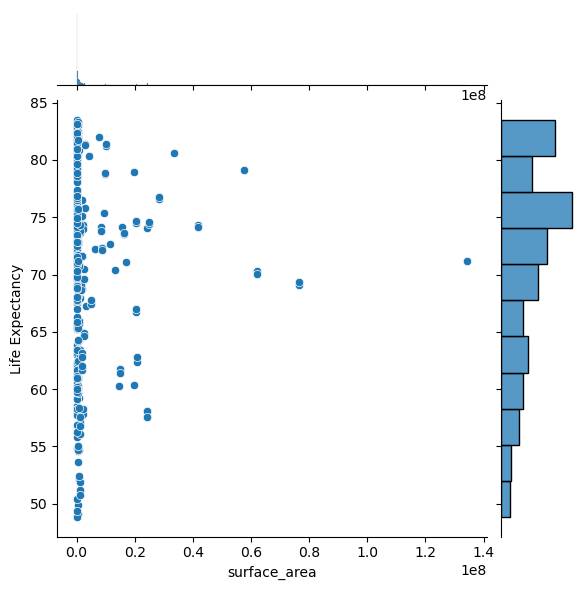

<Figure size 1000x600 with 0 Axes>

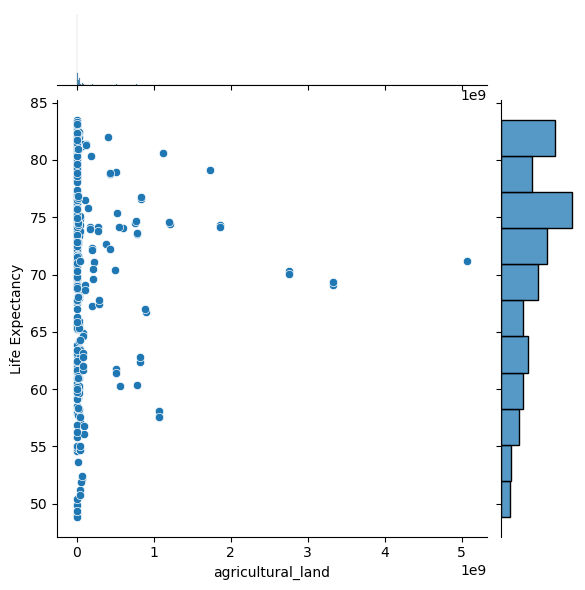

<Figure size 1000x600 with 0 Axes>

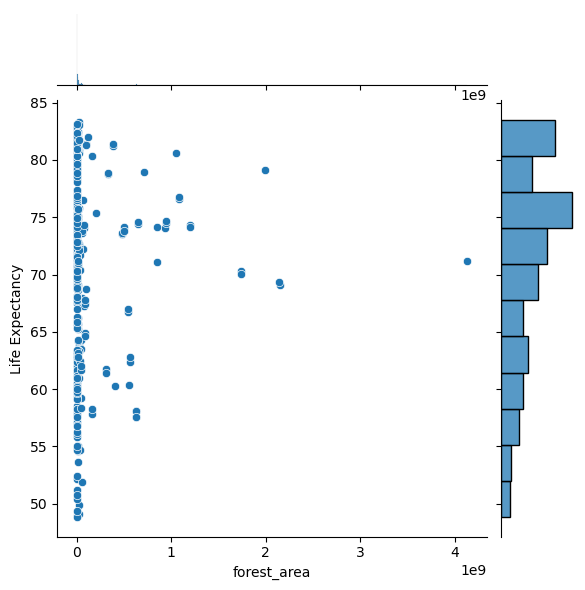

<Figure size 1000x600 with 0 Axes>

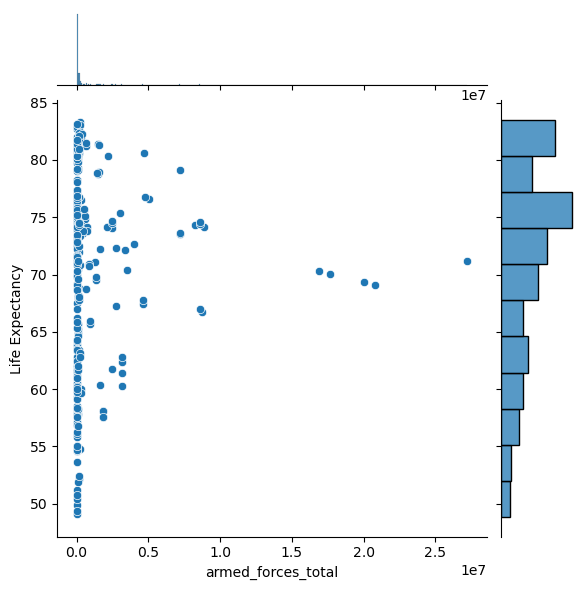

<Figure size 1000x600 with 0 Axes>

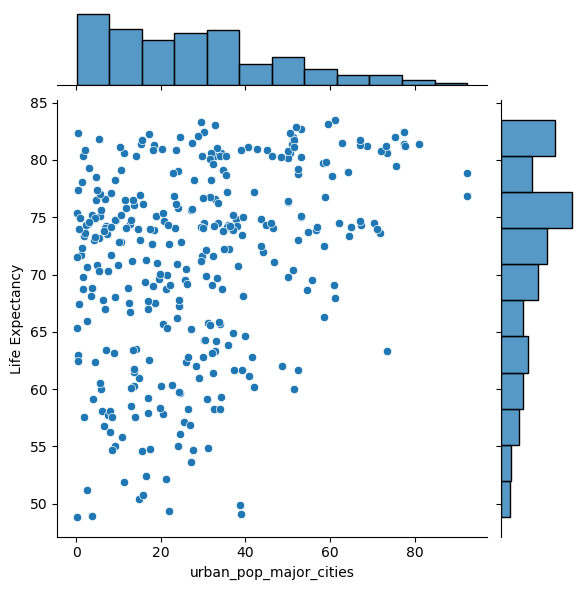

<Figure size 1000x600 with 0 Axes>

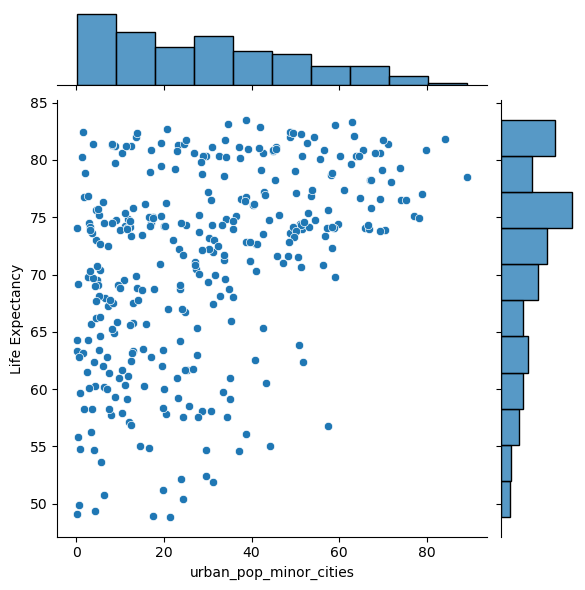

<Figure size 1000x600 with 0 Axes>

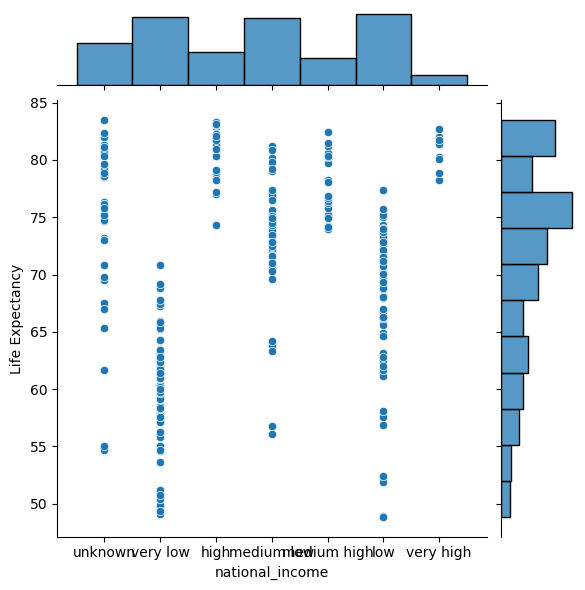

<Figure size 1000x600 with 0 Axes>

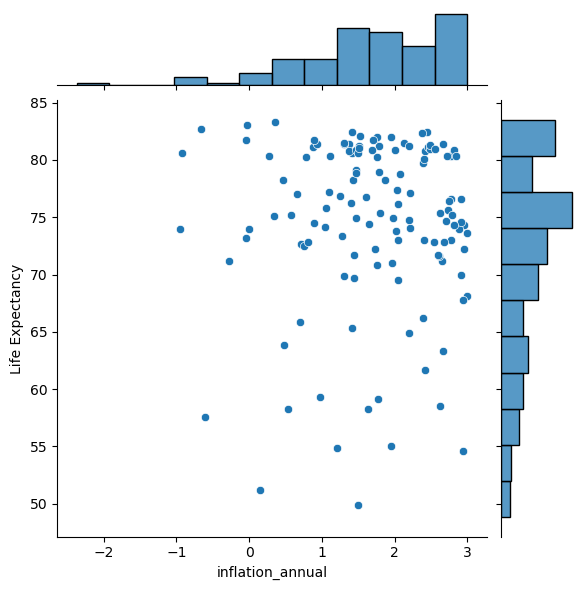

<Figure size 1000x600 with 0 Axes>

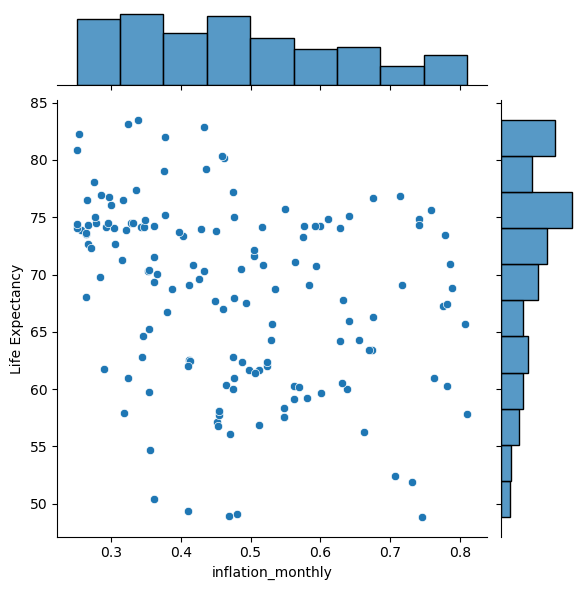

<Figure size 1000x600 with 0 Axes>

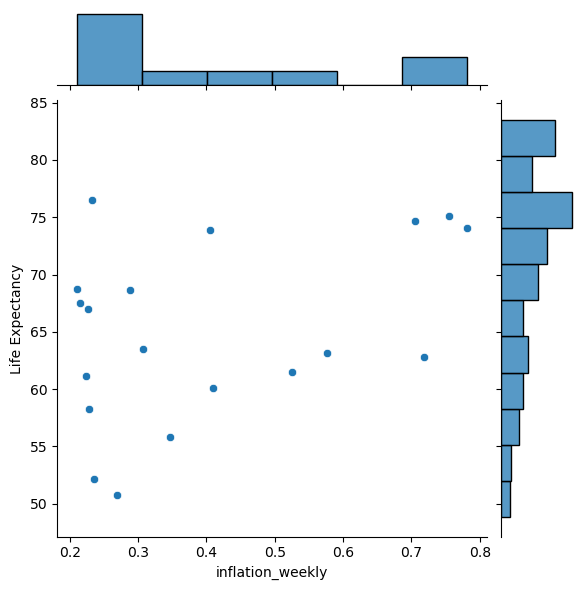

<Figure size 1000x600 with 0 Axes>

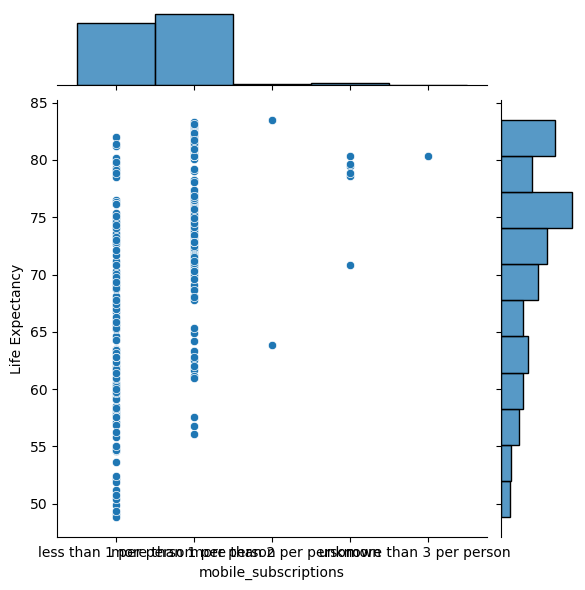

<Figure size 1000x600 with 0 Axes>

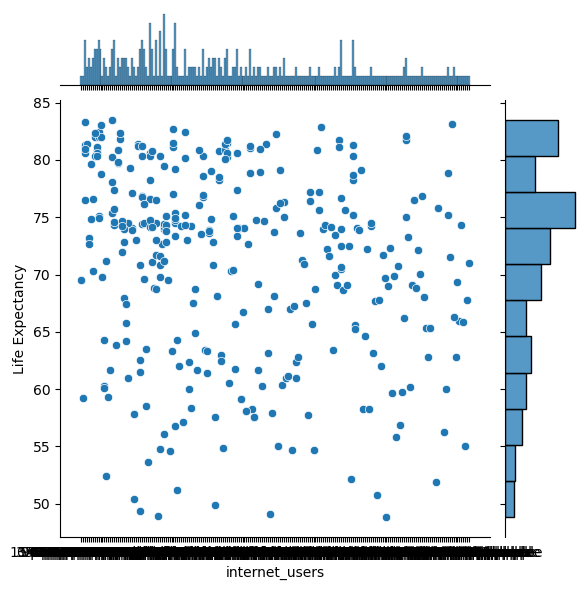

<Figure size 1000x600 with 0 Axes>

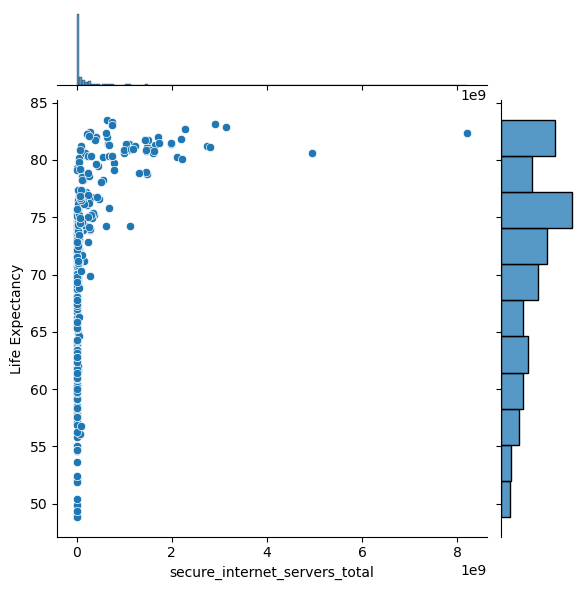

<Figure size 1000x600 with 0 Axes>

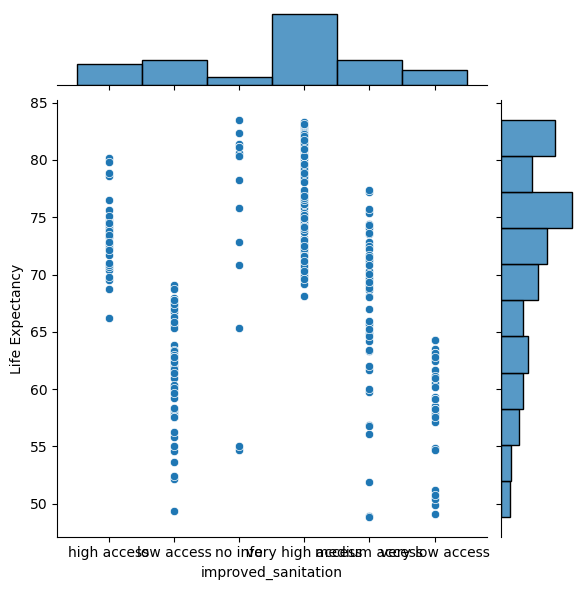

<Figure size 1000x600 with 0 Axes>

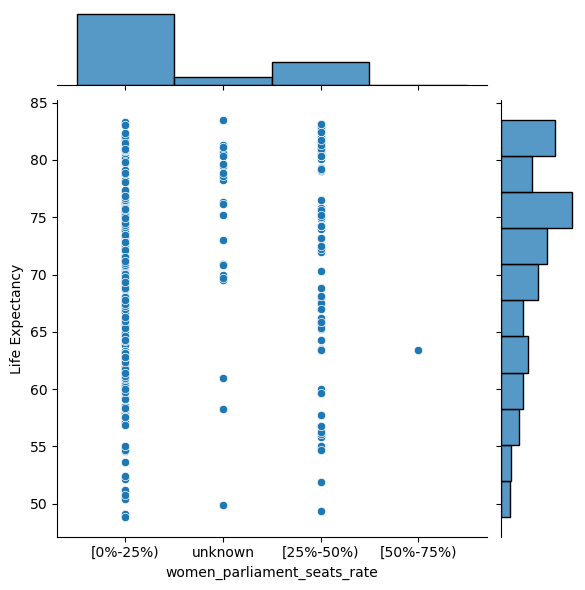

In [34]:
# plot joint plots for all columns
for col in train_data.columns:
    if col != 'life_expectancy':
        plt.figure(figsize=(10, 6))
        sns.jointplot(x=col, y='life_expectancy', data=data)
        plt.xlabel(col)
        plt.ylabel('Life Expectancy')
        plt.show()



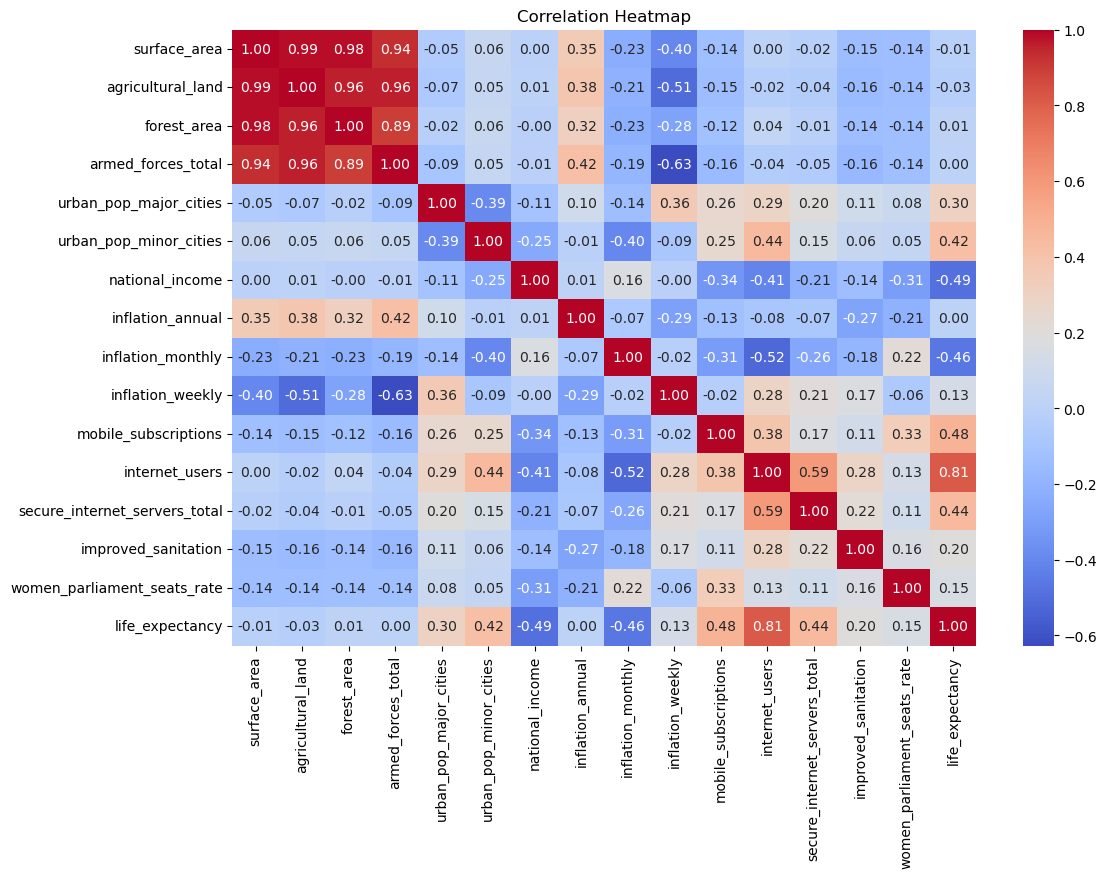

In [35]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


<Figure size 1000x600 with 0 Axes>

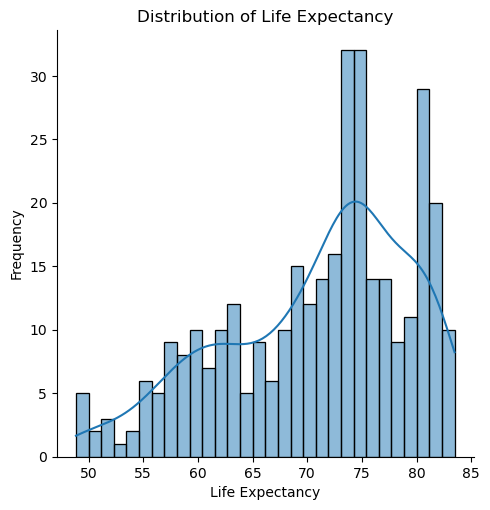

In [36]:
# distribution plot of target variable (life expectancy)
plt.figure(figsize=(10, 6))
sns.displot(train_data['life_expectancy'], bins=30, kde=True)
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.title('Distribution of Life Expectancy')
plt.show()


## Feature Selection

After performing a thorough analysis, we can select useful features required and train the model using those features. Sometimes, we can simply pass all the features and then determine important features from the trained classifier by evaluating the weights assigned by the classifier to each features. We'll get to that later on. 

In [37]:
# We have already removed inflation monthly and weekly. 
# Fetures agricultural_land and forest_area are highly correlated with surface_area. 
# Remove agricultural_land and forest_area and keep surface_area only

train_data = train_data.drop(columns=['agricultural_land', 'forest_area'])
train_data.shape

(362, 14)

In [38]:
train_data = train_data.drop(columns=['inflation_monthly', 'inflation_weekly'])

## Model Training

This is a Regression problem since we are predicting life expetancy which is a continous random variable. The steps involved are as follows:

1. Standardize or Normalize Training Data
2. Train Test Split
3. Train Model
4. Evaluate Important Features

**Note: It's a good practice to train multiple models (2 or 3 at least) and then choose the best performing model.**

In [39]:
# Standardize data


# Columns not to be standardized. These are columns with categorical data, 
# also we don't standardize our target vraiable


# Pick remaining columns and standardize them 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
targetData = train_data["life_expectancy"]
inputData = train_data.drop(columns=["life_expectancy"])
numericalData = inputData.drop(columns=col_list)
categoricalData = inputData[col_list]

# Standardize the numerical columns
numericalData = scaler.fit_transform(numericalData)
numericalData = pd.DataFrame(numericalData, columns=inputData.drop(columns=col_list).columns.tolist())

inputData = pd.concat([numericalData, categoricalData], axis=1)


In [40]:
data = pd.concat([inputData, targetData], axis=1)
trainData = train_data.loc[train_data['life_expectancy'].notnull()]

In [41]:
if 'life_expectancy' not in trainData.columns:
    trainData['life_expectancy'] = train_data.loc[trainData.index, 'life_expectancy']

targetData = trainData["life_expectancy"]
trainData = trainData.drop(columns=['life_expectancy'])

In [42]:
# Train Test Split Model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(trainData, targetData, test_size=0.2, random_state=42)


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

model = LinearRegression()
model.fit(X_train, y_train)
yPred = model.predict(X_test)

model1 = RandomForestRegressor()
model1.fit(X_train, y_train)
yPred1 = model1.predict(X_test)

model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)
yPred2 = model2.predict(X_test)


In [44]:
# Measure mean absolute error for training and validation sets
mae = mean_absolute_error(y_test, yPred)
r2 = r2_score(y_test, yPred)
print("Linear Regression Model")
print("Mean Absolute Error:", mae)
print("R-squared:", r2)
print("\n")

mae = mean_absolute_error(y_test, yPred1)
r2 = r2_score(y_test, yPred1)
print("Random Forest Model")
print("Mean Absolute Error:", mae)
print("R-squared:", r2)
print("\n")

mae = mean_absolute_error(y_test, yPred2)
r2 = r2_score(y_test, yPred2)
print("Decision Tree Model")
print("Mean Absolute Error:", mae)
print("R-squared:", r2)



Linear Regression Model
Mean Absolute Error: 3.6071263534553966
R-squared: 0.680458485406726


Random Forest Model
Mean Absolute Error: 3.6133974290411754
R-squared: 0.6305915259166219


Decision Tree Model
Mean Absolute Error: 3.8757059210294122
R-squared: 0.42573069317739765


In [45]:
# important features for random forest regressor
importances = model1.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. {feature_names[indices[f]]}: {importances[indices[f]]:.6f}")

Feature ranking:
1. internet_users: 0.670955
2. secure_internet_servers_total: 0.138799
3. armed_forces_total: 0.033980
4. surface_area: 0.032855
5. national_income: 0.027902
6. urban_pop_major_cities: 0.024649
7. inflation_annual: 0.023254
8. urban_pop_minor_cities: 0.021041
9. improved_sanitation: 0.010859
10. mobile_subscriptions: 0.009082
11. women_parliament_seats_rate: 0.006625


## Testing and Optimization

After training your model and establishing a baseline performance on default parameters, you have to work on optimizaing it to achieve best results. For this you have to perform hyper-parameter tuning and there are a couple of ways to do this but an efficient solution is using Grid-Search-Cross-Validation approach where you form a grid of parameters and iteratively apply cross-validation to find the best set of parameters for which our model performs the best.

In [46]:
# Parameter grid for fine-tuning random forest regressor 
# You can take a look at scikit-learn official documentation 
# where you'll find the parameters of random forest regressor
from sklearn.model_selection import GridSearchCV

paramGrid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ["sqrt", "log2"]
}

randomForest = RandomForestRegressor(random_state=42)
gridSearch = GridSearchCV(estimator=randomForest, param_grid=paramGrid, cv=5, n_jobs=-1, verbose=2, scoring='r2')
gridSearch.fit(X_train, y_train)

# Get the best parameters from the grid search
bestParams = gridSearch.best_params_
print("Best Parameters:", bestParams)
bestR2 = gridSearch.best_score_
print("Best R-squared:", bestR2)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R-squared: 0.7540972459610005


In [47]:
# get best model (trained on best set of params) from grid search cv
bestModel = gridSearch.best_estimator_
bestModel.fit(X_train, y_train)

y_pred = bestModel.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Random Forest Model")
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Random Forest Model
Mean Absolute Error: 3.1711084990632386
R-squared: 0.7287017304397416


In [48]:
# Save models as pickle files
import pickle

# Create a models directory if it doesn't exist
import os
if not os.path.exists('models'):
    os.makedirs('models')

# Save all trained models
pickle.dump(model, open('models/linear_regression_model.pkl', 'wb'))
print("Linear Regression model saved as 'models/linear_regression_model.pkl'")

pickle.dump(model1, open('models/random_forest_model.pkl', 'wb'))
print("Random Forest model saved as 'models/random_forest_model.pkl'")

pickle.dump(model2, open('models/decision_tree_model.pkl', 'wb'))
print("Decision Tree model saved as 'models/decision_tree_model.pkl'")

pickle.dump(bestModel, open('models/best_random_forest_model.pkl', 'wb'))
print("Best Random Forest model (GridSearchCV) saved as 'models/best_random_forest_model.pkl'")

# Also save the scaler for future use
pickle.dump(scaler, open('models/standard_scaler.pkl', 'wb'))
print("Standard Scaler saved as 'models/standard_scaler.pkl'")

print("\nAll models and scaler have been successfully saved!")

Linear Regression model saved as 'models/linear_regression_model.pkl'
Random Forest model saved as 'models/random_forest_model.pkl'
Decision Tree model saved as 'models/decision_tree_model.pkl'
Best Random Forest model (GridSearchCV) saved as 'models/best_random_forest_model.pkl'
Standard Scaler saved as 'models/standard_scaler.pkl'

All models and scaler have been successfully saved!


In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

with open('models/regression_report.txt', 'w') as f:
    f.write("Linear Regression Model:\n")
    f.write(f"MAE: {mean_absolute_error(y_test, yPred):.4f}\n")
    f.write(f"MSE: {mean_squared_error(y_test, yPred):.4f}\n")
    f.write(f"R2: {r2_score(y_test, yPred):.4f}\n\n")

    f.write("Random Forest Model:\n")
    f.write(f"MAE: {mean_absolute_error(y_test, yPred1):.4f}\n")
    f.write(f"MSE: {mean_squared_error(y_test, yPred1):.4f}\n")
    f.write(f"R2: {r2_score(y_test, yPred1):.4f}\n\n")

    f.write("Decision Tree Model:\n")
    f.write(f"MAE: {mean_absolute_error(y_test, yPred2):.4f}\n")
    f.write(f"MSE: {mean_squared_error(y_test, yPred2):.4f}\n")
    f.write(f"R2: {r2_score(y_test, yPred2):.4f}\n\n")

    f.write("Best Random Forest Model (GridSearchCV):\n")
    y_pred_best = bestModel.predict(X_test)
    f.write(f"MAE: {mean_absolute_error(y_test, y_pred_best):.4f}\n")
    f.write(f"MSE: {mean_squared_error(y_test, y_pred_best):.4f}\n")
    f.write(f"R2: {r2_score(y_test, y_pred_best):.4f}\n")
